## What are the most demanded skills for the top 3 most popular data roles?

### Methodology
1. Clean-up skill column
2. Calculate skill count
3. Calculate skill percentage
4. Plot findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data, Author: Luke Barousse, Site: Hugging Face
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

# Data Cleanup (job_skills to list and dates with correct format)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# New dataframe filtered for Mexico
df_mexico = df[df['job_country'] == 'Mexico'].copy()

In [4]:
# Explode the job_skills column to have one skill per row
df_mexico_exploded = df_mexico.explode('job_skills')

In [11]:
# Count the number of skills in each job per job_title_short
skills_count = df_mexico_exploded.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skills_count = skills_count.sort_values(by='skill_count', ascending=False)

# Get unique job titles for the top 3
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3] 
job_titles

['Data Engineer', 'Data Scientist', 'Data Analyst']

In [ ]:
# Total number of jobs per job_title_short
# This will give us the total number of jobs for each job title in Mexico
df_total_jobs = df_mexico['job_title_short'].value_counts().reset_index(name='jobs_total').copy()
df_total_jobs

,job_title_short,jobs_total
0,Data Engineer,4333
1,Data Analyst,2807
2,Data Scientist,2800
3,Software Engineer,1430
4,Business Analyst,1358
5,Senior Data Engineer,843
6,Senior Data Scientist,494
7,Machine Learning Engineer,381
8,Cloud Engineer,367
9,Senior Data Analyst,326


In [19]:
df_skills_percent = pd.merge(df_skills_count, df_total_jobs, on='job_title_short', how='left')
df_skills_percent

,job_title_short,job_skills,skill_count,jobs_total
0,Data Engineer,sql,2953,4333
1,Data Engineer,python,2698,4333
2,Data Scientist,python,1745,2800
3,Data Scientist,sql,1606,2800
4,Data Engineer,aws,1433,4333
...,...,...,...,...
1393,Business Analyst,cobol,1,1358
1394,Business Analyst,arch,1,1358
1395,Software Engineer,xamarin,1,1430
1396,Software Engineer,yarn,1,1430


In [ ]:
# Calculate the percentage using df_skills_percent
df_skills_percent['skill_percentage'] = (df_skills_percent['skill_count'] / df_skills_percent['jobs_total']) * 100
df_skills_percent

,job_title_short,job_skills,skill_count,jobs_total,skill_percentage
0,Data Engineer,sql,2953,4333,68.151396
1,Data Engineer,python,2698,4333,62.266328
2,Data Scientist,python,1745,2800,62.321429
3,Data Scientist,sql,1606,2800,57.357143
4,Data Engineer,aws,1433,4333,33.071775
...,...,...,...,...,...
1393,Business Analyst,cobol,1,1358,0.073638
1394,Business Analyst,arch,1,1358,0.073638
1395,Software Engineer,xamarin,1,1430,0.069930
1396,Software Engineer,yarn,1,1430,0.069930


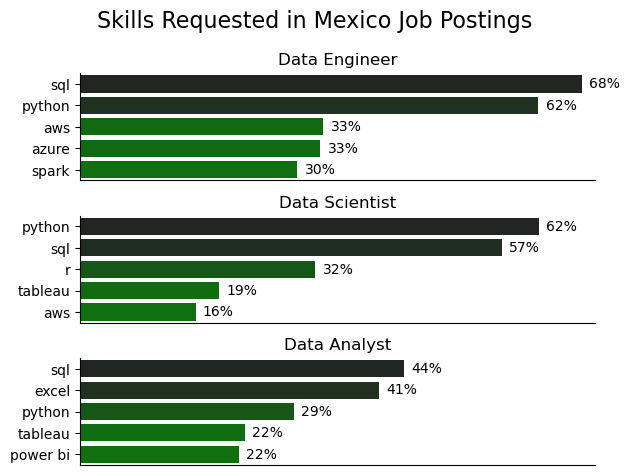

In [35]:
# Plot the top skills for each job title
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent['job_title_short'] == job_title].head(5)
    sns.barplot(x='skill_percentage', y='job_skills', data=df_plot, ax=ax[i], legend= False, hue = 'skill_count', palette='dark:g_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,70)

    for x, value in enumerate(df_plot['skill_percentage']):
        ax[i].text(value + 1, x, f'{value:.0f}%', va='center', fontsize=10)

    ax[i].set_xticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)

fig.suptitle('Skills Requested in Mexico Job Postings', fontsize=16)    
plt.tight_layout()